# Obtain Forecasts Using Exponential Smoothing

***

### Importing Modules and Loading in Data

In [1]:
# load modules
import statsmodels.tsa.holtwinters as sm
import statsmodels.tools.eval_measures as em
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import weekly finance series, skipping column names
ts = np.genfromtxt("../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)

In [3]:
ts.shape

(164, 247)

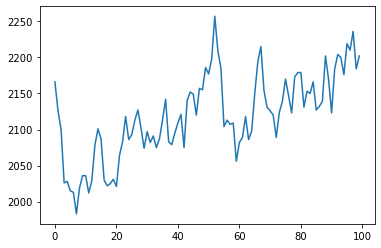

In [4]:
plt.plot(ts[4,:100])

***

### Experimental Modeling

See the [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing) documentation for the `ExponentialSmoothing` function.

In [5]:
# exponential smoothing function
# can be used for SES + trend/damped trend + seasonal
ES = sm.ExponentialSmoothing(endog = ts[4,:100], # time series to model
                             initialization_method = 'estimated') # method to initialize the recursions

In [6]:
ses = ES.fit()

In [7]:
ses.summary()

Dep. Variable:,endog,No. Observations:,100
Model:,ExponentialSmoothing,SSE,97989.631
Optimized:,True,AIC,692.745
Trend:,None,BIC,697.955
Seasonal:,None,AICC,693.166
Seasonal Periods:,None,Date:,"Mon, 07 Feb 2022"
Box-Cox:,False,Time:,17:47:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9074864,alpha,True
initial_level,2162.0184,l.0,True


The fitted object has parameters $[\alpha, \beta, \gamma, \text{initial_level}, \text{initial_trend}, \phi]$.

In [8]:
ses.optimized

array([ True, False, False,  True, False, False])

***

### Generalized Modeling - One Series

Construct a loop that trains a simple exponential smoothing model on `nt` time periods, then generates `nfs` rolling one-step-ahead forecasts.

In [9]:
# loop performing rolling one-step-ahead forecasts

# number of initial training observations
nt = 100
# number of forecasts to perform
nfs = 100
# empty array to store forecasted values
pred_vals = np.array([])

for i in range(nfs):
    # specify model
    ES = sm.ExponentialSmoothing(endog = ts[4, :(nt+i)],
                                 initialization_method = 'estimated')
    # fit model
    ses = ES.fit()
    # extract one-step-ahead forecast
    pred_vals = np.append(pred_vals, ses.fittedfcast[-1])

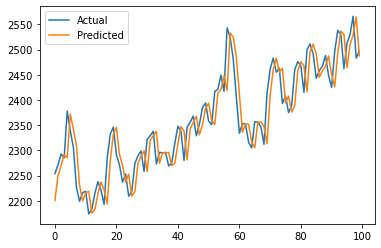

In [10]:
plt.plot(ts[4, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals, label = "Predicted")
plt.legend()

***

### Generalized Modeling - All Series

In [11]:
# number of initial training observations
nt = 200
# number of forecasts to perform
nfs = 47
# empty array to store forecasted values
pred_vals = np.zeros([ts.shape[0], nfs])

# loop through all series
for i in range(ts.shape[0]):
    # loop for nfs one-step-ahead forecasts
    for j in range(nfs):
        #specify model
        ES = sm.ExponentialSmoothing(endog = ts[i, :(nt+j)],
                                     initialization_method = 'estimated')
        
        # fit model
        ses = ES.fit()
        # extract one-step-ahead forecast
        pred_vals[i,j] = ses.fittedfcast[-1]

In [12]:
# array of forecasts for each series
pred_vals

array([[10647.95671217, 10667.24308356, 10659.33268771, ...,
        10642.24615641, 10678.82898703, 10678.00368315],
       [ 3587.4       ,  3711.49999815,  3711.5       , ...,
         3534.2       ,  3566.89999946,  3566.9       ],
       [  961.62017289,   975.58522221,   987.38963895, ...,
         1049.58249914,  1071.51873696,  1052.7357924 ],
       ...,
       [ 2450.2167574 ,  2341.46295713,  2479.64595469, ...,
         2519.81121194,  2407.33835725,  2386.42689151],
       [ 1731.61567816,  1820.00484785,  1932.31715886, ...,
         2108.12395478,  2103.8374189 ,  2157.10229505],
       [ 6574.02973158,  6366.7040184 ,  6282.68162553, ...,
         6017.09463751,  6118.16286118,  6032.5070758 ]])

In [13]:
# actual values
actual_vals = ts[:, nt:(nt+nfs)]
actual_vals

array([[10667.34, 10659.32, 10662.86, ..., 10678.92, 10678.  , 10676.48],
       [ 3711.5 ,  3711.5 ,  3626.3 , ...,  3566.9 ,  3566.9 ,  3489.8 ],
       [ 1007.1 ,  1013.3 ,   914.4 , ...,  1113.3 ,  1016.8 ,  1084.1 ],
       ...,
       [ 2329.  ,  2498.5 ,  2385.1 , ...,  2378.3 ,  2381.2 ,  2509.4 ],
       [ 1863.9 ,  1985.  ,  1937.  , ...,  2102.2 ,  2177.5 ,  2160.3 ],
       [ 6307.  ,  6259.  ,  6003.  , ...,  6140.  ,  6014.  ,  5811.  ]])

In [14]:
# calculate root mean squared error and mean absolute error

# empty arrays for errors
rmse = np.zeros(ts.shape[0])
mae = np.zeros(ts.shape[0])

for i in range(ts.shape[0]):
    rmse[i] = em.rmse(actual_vals[i,:], pred_vals[i,:])
    mae[i] = em.meanabs(actual_vals[i,:], pred_vals[i,:])

In [15]:
# average root mean squared error
np.mean(rmse)

70.1273144007386

In [16]:
# average mean absolute error
np.mean(mae)

51.20776300962823

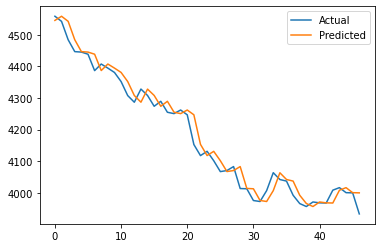

In [17]:
plt.plot(ts[10, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[10,:], label = "Predicted")
plt.legend()

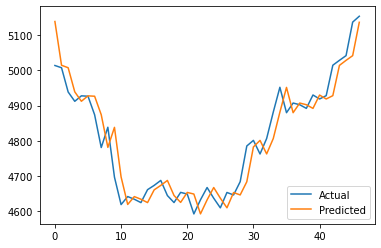

In [18]:
plt.plot(ts[50, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[50,:], label = "Predicted")
plt.legend()

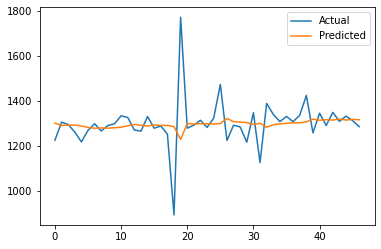

In [19]:
plt.plot(ts[150, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[150,:], label = "Predicted")
plt.legend()

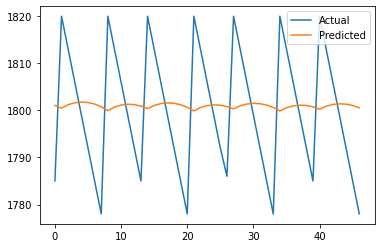

In [20]:
plt.plot(ts[160, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[160,:], label = "Predicted")
plt.legend()

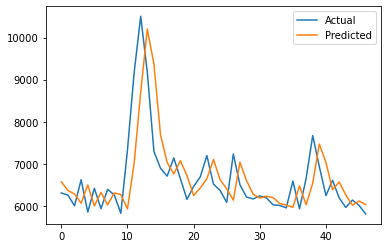

In [21]:
plt.plot(ts[163, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[163,:], label = "Predicted")
plt.legend()